# Laboratorio 3, Statistical Learning, KNN


## Importando librerías a utilizar

In [14]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

## Carga de datos Dataset

In [15]:
df = pd.read_csv('KNN_Dataset.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


## Exploración de datos para conocer mejor el dataset

In [16]:
df.sample(10)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
474,1,60,44,1,4,150.0,2,24,0.0,0,2,4
287,1,35,66,1,44,14.0,3,12,1.0,1,2,3
379,2,33,28,1,3,24.0,2,0,0.0,1,6,1
811,3,28,22,1,3,23.0,3,1,0.0,0,5,1
723,3,10,28,1,2,36.0,4,0,0.0,1,3,4
954,2,7,41,0,6,94.0,2,16,0.0,0,1,4
946,1,46,48,1,15,64.0,3,20,0.0,0,2,3
470,3,37,51,1,26,24.0,4,4,0.0,0,2,2
78,1,67,68,0,28,244.0,1,47,0.0,1,1,3
364,1,53,35,0,15,59.0,3,5,0.0,1,1,3


In [17]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

Los valores de cutscat es el tipo de servicio que se tiene. Estos son:

1. Basic Service
2. E-Service
3. Plus Service
4. Total Service

También se puede utilizar gráficas para revisar los datos, como el siguiente histograma

array([[<AxesSubplot:title={'center':'income'}>]], dtype=object)

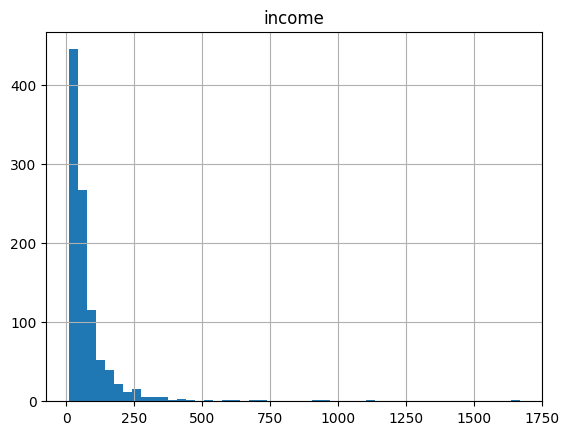

In [18]:
df.hist(column='income', bins=50)

En este, se puede ver el ingreso de los clientes que se tienen.

## Feature set

In [19]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [20]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [21]:
Y = df[['custcat']].values
Y[0:5]

array([[1],
       [4],
       [3],
       [1],
       [3]], dtype=int64)

Acá, se define que la variable dependiente es custcat, mientras que todo el resto es un conjunto de variables dependientes.

## Estandarización de los datos

Los datos deben ser estandarizados para evitar que una de las variables tenga un mayor peso que las demás.

In [22]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

## Split de los datos para entrenamiento y pruebas


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Set de Entrenamiento:', X_train.shape,  y_train.shape)
print ('Set de Prueba:', X_test.shape,  y_test.shape)

Set de Entrenamiento: (800, 11) (800, 1)
Set de Prueba: (200, 11) (200, 1)
